# 📦 Importation des bibliothèques nécessaires pour la manipulation des données et la visualisation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Chargement du jeu de données Avito et affichage de sa taille (nombre de lignes et de colonnes).

In [2]:
df = pd.read_csv('data_avito.csv')
df.shape

(1773, 9)

# 👀 Affichage des premières lignes du jeu de données pour un aperçu rapide.

In [3]:
df.head()

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...
4,Appartement à Rabat Agdal,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...


# ℹ️ Informations générales sur le DataFrame : types de colonnes, valeurs manquantes, etc.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB


# 📊 Statistiques descriptives sur les colonnes numériques du jeu de données.

In [5]:
df.describe()

,salon,nb_rooms,nb_baths,surface_area
count,1620.000000,1490.000000,1480.000000,1742.000000
mean,1.267284,2.379195,2.307432,174.933410
std,0.557539,0.667159,7.629128,2969.500693
min,0.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,71.000000
50%,1.000000,2.000000,2.000000,89.000000
75%,1.000000,3.000000,2.000000,114.750000
max,8.000000,7.000000,134.000000,123456.000000


# 🔍 Comptage du nombre de valeurs manquantes dans chaque colonne.

In [6]:
df.isnull().sum()

,0
title,1
price,283
city_name,1
salon,153
nb_rooms,283
nb_baths,293
surface_area,31
equipment,371
link,0


# 🔁 Vérification du nombre de doublons dans le DataFrame.

In [7]:
df.duplicated().sum()

np.int64(41)

# 🧹 Suppression des doublons pour nettoyer les données.

In [8]:
df = df.drop_duplicates()

# 📏 Affichage du nombre de lignes après suppression des doublons.

In [9]:
len(df)

1732

# 💰 Nettoyage de la colonne 'price' : suppression du texte 'DH' et des espaces, conversion en float.

In [10]:
df['price'] = df['price'].str.replace('DH', '', regex=False)
df['price'] = df['price'].str.replace(' ', '', regex=False)
df['price'] = df['price'].astype(float)

/tmp/ipython-input-10-2638613262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace('DH', '', regex=False)
/tmp/ipython-input-10-2638613262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace(' ', '', regex=False)
/tmp/ipython-input-10-2638613262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

# 🛠️ Remplacement des valeurs manquantes dans 'equipment' par 'Unknown'.

In [11]:
df['equipment'] = df['equipment'].fillna("Unknown")

/tmp/ipython-input-11-2159125861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['equipment'] = df['equipment'].fillna("Unknown")


# 🏷️ Transformation de la colonne 'equipment' en variables indicatrices (one-hot encoding).

In [12]:
equipments_dummies = df['equipment'].str.get_dummies(sep='/')

# ➕ Ajout des colonnes d'équipements encodées au DataFrame principal.

In [13]:
df = pd.concat([df, equipments_dummies], axis=1)

# 🗑️ Suppression de la colonne originale 'equipment' devenue inutile.

In [14]:
df = df.drop(columns=['equipment'])

# 👀 Affichage des 10 premières lignes du DataFrame après transformation.

In [15]:
df.head(10)

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,link,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse,Unknown
0,CMN-MA-1752 - Appartement à vendre à Palmier,2000000.0,Casablanca,NaN,2.0,2.0,168.0,https://www.avito.ma/fr/palmier/appartements/C...,1,1,0,0,0,0,0,0,1,0,1,0
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1195000.0,Casablanca,NaN,2.0,2.0,98.0,https://www.avito.ma/fr/hay_hassani/appartemen...,1,1,1,1,0,1,0,0,1,0,0,0
2,Appartement à vendre 81 m² à Dar Bouazza,1350000.0,Dar Bouazza,1.0,2.0,2.0,81.0,https://www.avito.ma/fr/dar_bouazza/appartemen...,1,1,1,1,1,1,1,0,1,1,1,0
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900000.0,Casablanca,NaN,1.0,1.0,56.0,https://www.avito.ma/fr/centre_ville/apparteme...,1,0,1,1,0,1,0,1,1,1,1,0
4,Appartement à Rabat Agdal,3100000.0,Rabat,2.0,3.0,2.0,200.0,https://www.avito.ma/fr/agdal/appartements/App...,1,1,0,0,1,0,0,0,1,1,0,0
5,66644-Vente Appt à Casablanca Val Fleury de 27...,3200000.0,Casablanca,NaN,4.0,2.0,215.0,https://www.avito.ma/fr/maarif/appartements/66...,1,0,1,1,0,1,0,0,1,0,1,0
6,Appartement à vendre 98 m² à Marrakech,760000.0,Marrakech,1.0,3.0,3.0,98.0,https://www.avito.ma/fr/akioud/appartements/Ap...,1,1,0,0,1,1,0,0,1,1,0,0
7,50620-Vente Appt à Casablanca Hay Mohammadi de 73,790000.0,Casablanca,NaN,3.0,2.0,73.0,https://www.avito.ma/fr/hay_mohammadi/appartem...,0,0,0,0,0,1,0,0,0,0,0,0
8,appartement à vendre,780000.0,Asilah,1.0,2.0,1.0,72.0,https://www.avito.ma/fr/asilah/appartements/ap...,0,1,0,0,0,1,0,1,0,1,0,0
9,61833-Vente Appt à Casablanca Sidi Moumen de 1...,1990000.0,Casablanca,NaN,5.0,2.0,178.0,https://www.avito.ma/fr/sidi_moumen/appartemen...,0,0,0,0,0,1,1,0,0,1,1,0


# 🧮 Remplacement des valeurs manquantes dans les colonnes numériques par la médiane de chaque colonne.

In [16]:
numerical_cols = ['price', 'salon', 'nb_rooms', 'nb_baths', 'surface_area']

for col in numerical_cols:
    median = df[col].median()
    df[col] = df[col].fillna(median)

# 🏙️ Affichage des différentes villes présentes dans la colonne 'city_name'.

In [17]:
df['city_name'].unique()

array(['Casablanca', 'Dar Bouazza', 'Rabat', 'Marrakech', 'Asilah',
       'Bouskoura', 'Kénitra', 'Mohammedia', 'Agadir', 'Tamesna', 'Salé',
       'Had Soualem', 'Temara', 'Benslimane', 'Tanger', 'Bouznika',
       'Meknès', 'Fès', 'El Jadida', 'El Mansouria', 'Martil',
       'الدار البيضاء', 'Fnideq', 'Tétouan', 'Saidia', 'Nouaceur',
       'القنيطرة', 'Tamaris', 'طنجة', 'Cabo Negro',
       'Sidi Allal El Bahraoui', 'Béni Mellal', 'أكادير', nan,
       'Essaouira', 'Mehdia', 'المحمدية', 'Oujda', 'Oued Laou', 'Dcheira',
       'Sidi Rahal', 'Deroua', 'مراكش', 'Ain Attig', 'Safi', 'الرباط',
       'Inzegan', 'Ifrane', 'Dakhla', 'Dcheïra El Jihadia', 'Taghazout',
       'Sidi Bouknadel', 'Skhirat', 'Khouribga', 'Berkane',
       'Mers El Kheir', 'Berrechid', 'Tiznit', 'Agadir Melloul', 'Nador',
       'El Menzeh', 'Bni Ansar', 'Mdiq', 'Tit Mellil', 'Souk El Arbaa',
       'Biougra', 'Settat', 'Ain Aouda', 'Taza', 'Khemisset', 'Oued Zem',
       'Sefrou', 'Merzouga', 'El Hajeb', 'Selo

# 🌍 Dictionnaire de traduction des noms de villes de l'arabe vers le français.

In [18]:
city_translation = {
    "الدار البيضاء": "Casablanca",
    "الرباط": "Rabat",
    "طنجة": "Tanger",
    "مراكش": "Marrakech",
    "أكادير": "Agadir",
    "فاس": "Fès",
    "القنيطرة": "Kénitra",
    "المحمدية": "Mohammedia"

}


# 🏷️ Remplacement des noms de villes arabes par leur équivalent français et gestion des valeurs manquantes.

In [19]:
df['city_name'] = df['city_name'].replace(city_translation)
df['city_name'] = df['city_name'].fillna("Unknown")

# 🏙️ Vérification des noms de villes après traduction et traitement des valeurs manquantes.

In [20]:
df['city_name'].unique()

array(['Casablanca', 'Dar Bouazza', 'Rabat', 'Marrakech', 'Asilah',
       'Bouskoura', 'Kénitra', 'Mohammedia', 'Agadir', 'Tamesna', 'Salé',
       'Had Soualem', 'Temara', 'Benslimane', 'Tanger', 'Bouznika',
       'Meknès', 'Fès', 'El Jadida', 'El Mansouria', 'Martil', 'Fnideq',
       'Tétouan', 'Saidia', 'Nouaceur', 'Tamaris', 'Cabo Negro',
       'Sidi Allal El Bahraoui', 'Béni Mellal', 'Unknown', 'Essaouira',
       'Mehdia', 'Oujda', 'Oued Laou', 'Dcheira', 'Sidi Rahal', 'Deroua',
       'Ain Attig', 'Safi', 'Inzegan', 'Ifrane', 'Dakhla',
       'Dcheïra El Jihadia', 'Taghazout', 'Sidi Bouknadel', 'Skhirat',
       'Khouribga', 'Berkane', 'Mers El Kheir', 'Berrechid', 'Tiznit',
       'Agadir Melloul', 'Nador', 'El Menzeh', 'Bni Ansar', 'Mdiq',
       'Tit Mellil', 'Souk El Arbaa', 'Biougra', 'Settat', 'Ain Aouda',
       'Taza', 'Khemisset', 'Oued Zem', 'Sefrou', 'Merzouga', 'El Hajeb',
       'Selouane', 'Taounate', 'Sidi Bennour', 'El Ksiba'], dtype=object)

# 🔍 Nouvelle vérification des valeurs manquantes après nettoyage.

In [21]:
df.isnull().sum()

,0
title,1
price,0
city_name,0
salon,0
nb_rooms,0
nb_baths,0
surface_area,0
link,0
Ascenseur,0
Balcon,0


# 🚫 Définition d'une fonction pour supprimer les valeurs aberrantes (outliers) d'une colonne.

In [22]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)   # First quartile (25%)
    Q3 = df[col].quantile(0.75)   # Third quartile (75%)
    IQR = Q3 - Q1                 # IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR        # Lower bound
    upper = Q3 + 1.5 * IQR        # Upper bound
    return df[(df[col] >= lower) & (df[col] <= upper)]  # Keep only values in the range


# 🧹 Application de la suppression des outliers sur 'price' et 'surface_area'.

In [23]:
df = remove_outliers(df, 'price')
df = remove_outliers(df, 'surface_area')

# 📏 Affichage du nombre de lignes après suppression des outliers.

In [24]:
len(df)

1547

# 🔢 Encodage des noms de villes en valeurs numériques avec LabelEncoder.

In [25]:
from sklearn.preprocessing import LabelEncoder

# Create the encoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the city_name column
df['city_encoded'] = label_encoder.fit_transform(df['city_name'])


# 🗺️ Création et affichage du dictionnaire de correspondance entre les villes et leur code numérique.

In [26]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)


{'Agadir': np.int64(0), 'Agadir Melloul': np.int64(1), 'Ain Aouda': np.int64(2), 'Ain Attig': np.int64(3), 'Asilah': np.int64(4), 'Benslimane': np.int64(5), 'Berkane': np.int64(6), 'Berrechid': np.int64(7), 'Biougra': np.int64(8), 'Bouskoura': np.int64(9), 'Bouznika': np.int64(10), 'Béni Mellal': np.int64(11), 'Cabo Negro': np.int64(12), 'Casablanca': np.int64(13), 'Dakhla': np.int64(14), 'Dar Bouazza': np.int64(15), 'Dcheira': np.int64(16), 'Dcheïra El Jihadia': np.int64(17), 'Deroua': np.int64(18), 'El Jadida': np.int64(19), 'El Ksiba': np.int64(20), 'El Mansouria': np.int64(21), 'El Menzeh': np.int64(22), 'Essaouira': np.int64(23), 'Fnideq': np.int64(24), 'Fès': np.int64(25), 'Had Soualem': np.int64(26), 'Ifrane': np.int64(27), 'Inzegan': np.int64(28), 'Khemisset': np.int64(29), 'Khouribga': np.int64(30), 'Kénitra': np.int64(31), 'Marrakech': np.int64(32), 'Martil': np.int64(33), 'Mdiq': np.int64(34), 'Mehdia': np.int64(35), 'Meknès': np.int64(36), 'Mers El Kheir': np.int64(37), 'Mo

# 🗑️ Suppression de la colonne 'city_name' (optionnel, car on utilise 'city_encoded').

In [27]:
df = df.drop(columns=['city_name'])  # optional

# 🗺️ Réaffichage du dictionnaire de correspondance ville/code (peut être redondant).

In [28]:
print(mapping)

{'Agadir': np.int64(0), 'Agadir Melloul': np.int64(1), 'Ain Aouda': np.int64(2), 'Ain Attig': np.int64(3), 'Asilah': np.int64(4), 'Benslimane': np.int64(5), 'Berkane': np.int64(6), 'Berrechid': np.int64(7), 'Biougra': np.int64(8), 'Bouskoura': np.int64(9), 'Bouznika': np.int64(10), 'Béni Mellal': np.int64(11), 'Cabo Negro': np.int64(12), 'Casablanca': np.int64(13), 'Dakhla': np.int64(14), 'Dar Bouazza': np.int64(15), 'Dcheira': np.int64(16), 'Dcheïra El Jihadia': np.int64(17), 'Deroua': np.int64(18), 'El Jadida': np.int64(19), 'El Ksiba': np.int64(20), 'El Mansouria': np.int64(21), 'El Menzeh': np.int64(22), 'Essaouira': np.int64(23), 'Fnideq': np.int64(24), 'Fès': np.int64(25), 'Had Soualem': np.int64(26), 'Ifrane': np.int64(27), 'Inzegan': np.int64(28), 'Khemisset': np.int64(29), 'Khouribga': np.int64(30), 'Kénitra': np.int64(31), 'Marrakech': np.int64(32), 'Martil': np.int64(33), 'Mdiq': np.int64(34), 'Mehdia': np.int64(35), 'Meknès': np.int64(36), 'Mers El Kheir': np.int64(37), 'Mo

# ⚖️ Importation du StandardScaler pour la normalisation des variables numériques.

In [29]:
from sklearn.preprocessing import StandardScaler

# 📏 Définition des colonnes à normaliser.

In [30]:
columns_to_scale = ['price', 'salon', 'nb_rooms', 'nb_baths', 'surface_area']

# ⚖️ Création de l'instance StandardScaler pour la normalisation.

In [31]:
scaler = StandardScaler()

# 📋 Copie du DataFrame pour appliquer la normalisation sans modifier l'original.

In [32]:
df_scaled = df.copy()

# ⚖️ Application de la normalisation sur les colonnes sélectionnées.

In [33]:
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

# 📊 Statistiques descriptives après normalisation.

In [34]:
print(df_scaled[columns_to_scale].describe())

              price         salon      nb_rooms      nb_baths  surface_area
count  1.547000e+03  1.547000e+03  1.547000e+03  1.547000e+03  1.547000e+03
mean  -8.267466e-17  1.469772e-16  2.755822e-17 -1.377911e-17 -1.653493e-16
std    1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00
min   -2.028958e+00 -2.458918e+00 -2.216468e+00 -3.089936e-01 -2.634628e+00
25%   -6.342107e-01 -4.148847e-01 -4.462687e-01 -1.694685e-01 -7.076932e-01
50%   -2.678660e-02 -4.148847e-01 -4.462687e-01 -2.994334e-02 -1.409476e-01
75%    4.524035e-01 -4.148847e-01  1.323930e+00 -2.994334e-02  6.524963e-01
max    3.032831e+00  1.389335e+01  3.094129e+00  1.838737e+01  2.881696e+00


# 👀 Vérification du DataFrame après normalisation.

In [35]:
df.head()

,title,price,salon,nb_rooms,nb_baths,surface_area,link,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse,Unknown,city_encoded
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1195000.0,1.0,2.0,2.0,98.0,https://www.avito.ma/fr/hay_hassani/appartemen...,1,1,1,1,0,1,0,0,1,0,0,0,13
2,Appartement à vendre 81 m² à Dar Bouazza,1350000.0,1.0,2.0,2.0,81.0,https://www.avito.ma/fr/dar_bouazza/appartemen...,1,1,1,1,1,1,1,0,1,1,1,0,15
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900000.0,1.0,1.0,1.0,56.0,https://www.avito.ma/fr/centre_ville/apparteme...,1,0,1,1,0,1,0,1,1,1,1,0,13
6,Appartement à vendre 98 m² à Marrakech,760000.0,1.0,3.0,3.0,98.0,https://www.avito.ma/fr/akioud/appartements/Ap...,1,1,0,0,1,1,0,0,1,1,0,0,32
7,50620-Vente Appt à Casablanca Hay Mohammadi de 73,790000.0,1.0,3.0,2.0,73.0,https://www.avito.ma/fr/hay_mohammadi/appartem...,0,0,0,0,0,1,0,0,0,0,0,0,13


# 🏗️ Sélection des features, création des jeux d'entraînement et de test.

In [36]:
features = ['salon', 'nb_rooms', 'nb_baths', 'surface_area', 'city_encoded',
            'Ascenseur', 'Balcon', 'Chauffage', 'Climatisation', 'Concierge',
            'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking', 'Sécurité', 'Terrasse']

#  Variable cible (target) = price
target = 'price'

#  Créer X (features) et y (target)
X = df_scaled[features]
y = df_scaled[target]

# Séparer les données : 80% train, 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les tailles pour vérifier
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (1237, 16)
X_test : (310, 16)
y_train: (1237,)
y_test : (310,)


# 📈 Régression linéaire : entraînement, prédiction et évaluation.

In [37]:
# 1. Importer le modèle
from sklearn.linear_model import LinearRegression

# 2. Créer l'objet modèle
model_lr = LinearRegression()

# 3. Entraîner le modèle (training)
model_lr.fit(X_train, y_train)

# 4. Prédire sur les données test
y_pred = model_lr.predict(X_test)

# 5. Importer les métriques d'évaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 6. Calculer les métriques
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 7. Afficher les résultats
print(" Résultats du modèle LinearRegression :")
print("MAE  :", mae)
print("RMSE :", rmse)
print("R²   :", r2)


 Résultats du modèle LinearRegression :
MAE  : 0.6085056639585783
RMSE : 0.8102514884364145
R²   : 0.28190760147765537


# 🌳 Modèle Random Forest : entraînement, prédiction et évaluation.

In [38]:
# 1. Importer le modèle
from sklearn.ensemble import RandomForestRegressor

# 2. Créer l'objet Random Forest
model_rf = RandomForestRegressor(random_state=42)

# 3. Entraîner le modèle
model_rf.fit(X_train, y_train)

# 4. Prédire sur le jeu de test
y_pred_rf = model_rf.predict(X_test)

# 5. Importer les métriques
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 6. Calculer les scores
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# 7. Afficher les résultats
print("Résultats du modèle Random Forest:")
print("MAE  :", mae_rf)
print("RMSE :", rmse_rf)
print("R²   :", r2_rf)


Résultats du modèle Random Forest:
MAE  : 0.4942246563183172
RMSE : 0.7322740167859584
R²   : 0.4134731430002764


# 📉 Modèle SVR : entraînement, prédiction et évaluation.

In [39]:
# 1. Importer SVR
from sklearn.svm import SVR

# 2. Créer le modèle SVR
model_svr = SVR()

# 3. Entraîner le modèle avec X_train et y_train
model_svr.fit(X_train, y_train)

# 4. Prédire sur X_test
y_pred_svr = model_svr.predict(X_test)

# 5. Calculer les métriques
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

# 6. Afficher les résultats
print("Résultats SVR :")
print("MAE  :", mae_svr)
print("RMSE :", rmse_svr)
print("R²   :", r2_svr)


Résultats SVR :
MAE  : 0.6249769404851373
RMSE : 0.8374003454275748
R²   : 0.23297958045206224


# 🚀 Modèle Gradient Boosting : entraînement, prédiction et évaluation.

In [40]:
# 1. Importer le modèle
from sklearn.ensemble import GradientBoostingRegressor

# 2. Créer le modèle
model_gb = GradientBoostingRegressor(random_state=42)

# 3. Entraîner le modèle avec X_train et y_train
model_gb.fit(X_train, y_train)

# 4. Prédire sur X_test
y_pred_gb = model_gb.predict(X_test)

# 5. Calculer les métriques
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# 6. Afficher les résultats
print("Résultats Gradient Boosting :")
print("MAE  :", mae_gb)
print("RMSE :", rmse_gb)
print("R²   :", r2_gb)


Résultats Gradient Boosting :
MAE  : 0.49357716906488003
RMSE : 0.7277368246904196
R²   : 0.42071890228409303


# 🔎 Optimisation des hyperparamètres du Gradient Boosting avec RandomizedSearchCV.

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modèle de base
gb = GradientBoostingRegressor(random_state=42)

# Espace de recherche élargi
param_dist = {
    'n_estimators': np.arange(50, 300, 10),
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': np.linspace(0.6, 1.0, 10)
}

# Configuration de la recherche
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Entraînement
random_search.fit(X_train, y_train)

# Évaluation
best_random = random_search.best_estimator_
y_pred_random = best_random.predict(X_test)

mae_random = mean_absolute_error(y_test, y_pred_random)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))
r2_random = r2_score(y_test, y_pred_random)

# Affichage des résultats
print("🔍 Meilleurs hyperparamètres :", random_search.best_params_)
print("📈 Meilleur score R² (cross-validation) :", random_search.best_score_)
print("📊 Résultats sur test set :")
print("MAE  :", mae_random)
print("RMSE :", rmse_random)
print("R²   :", r2_random)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
🔍 Meilleurs hyperparamètres : {'subsample': np.float64(0.6444444444444444), 'n_estimators': np.int64(110), 'max_depth': 4, 'learning_rate': np.float64(0.049999999999999996)}
📈 Meilleur score R² (cross-validation) : 0.36436651083205407
📊 Résultats sur test set :
MAE  : 0.4908945452954253
RMSE : 0.7237407262026844
R²   : 0.4270632526817263


# 📈 Visualisation : comparaison des prix réels et prédits (Gradient Boosting).

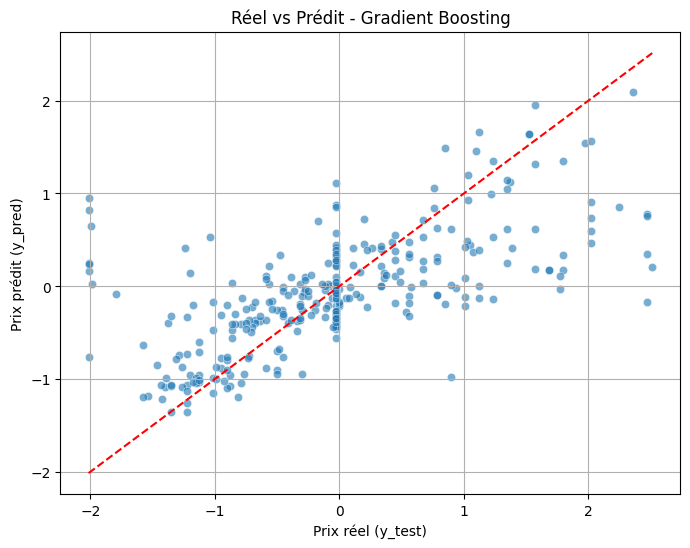

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_random, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Prix réel (y_test)")
plt.ylabel("Prix prédit (y_pred)")
plt.title("Réel vs Prédit - Gradient Boosting")
plt.grid(True)
plt.show()


# 📊 Visualisation de l'importance des variables dans le modèle Gradient Boosting.

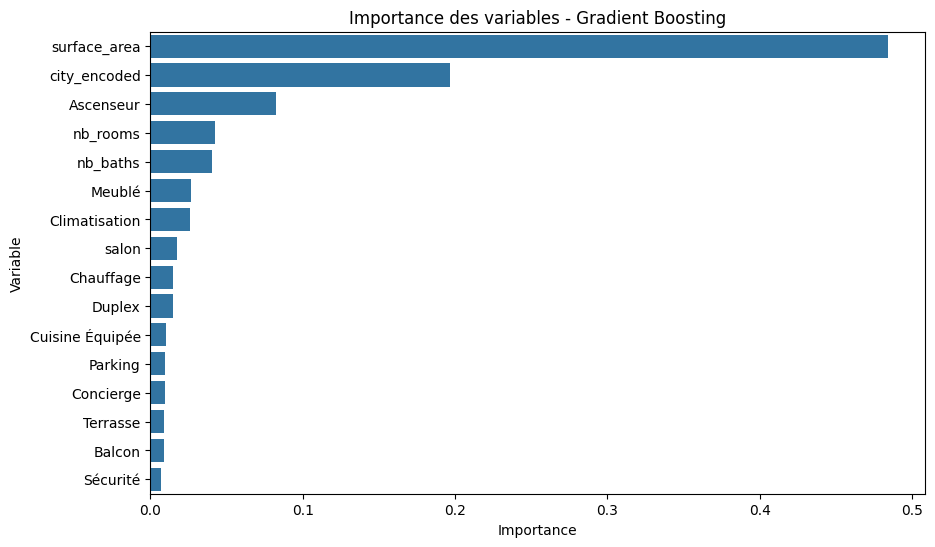

In [43]:
import pandas as pd

# Importance des features
importances = best_random.feature_importances_
features = X.columns  # les noms des colonnes
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Importance des variables - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.show()


# 🏗️ Ajout de nouvelles features : prix au mètre carré et extraction de mots-clés du titre (feature engineering).

In [44]:
# Add price per square meter
df['price_per_m2'] = df['price'] / df['surface_area']

# Extract keywords from title (example: 'luxe', 'neuf', 'meublé')
import numpy as np

def extract_keyword(title, keyword):
    if pd.isnull(title):
        return 0
    return int(keyword.lower() in title.lower())

keywords = ['luxe', 'neuf', 'meublé', 'piscine', 'terrasse']
for kw in keywords:
    df[f'kw_{kw}'] = df['title'].apply(lambda x: extract_keyword(x, kw))

# 🏷️ Encodage cible (target encoding) pour la ville : ajout de la moyenne des prix par ville comme nouvelle variable.

In [45]:
# Target encoding for city_name
city_target_mean = df.groupby('city_encoded')['price'].mean()
df['city_target_enc'] = df['city_encoded'].map(city_target_mean)

# 🏗️ Mise à jour de la liste des variables explicatives (features) pour inclure les nouvelles variables créées.

In [46]:
# Update features list
features = [
    'salon', 'nb_rooms', 'nb_baths', 'surface_area', 'price_per_m2',
    'city_encoded', 'city_target_enc'
] + [col for col in df.columns if col.startswith('kw_')] + [
    col for col in df.columns if col in [
        'Ascenseur', 'Balcon', 'Chauffage', 'Climatisation', 'Concierge',
        'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking', 'Sécurité', 'Terrasse'
    ]
]

# Remove any duplicates in features
features = list(dict.fromkeys(features))

# Prepare X and y
X = df[features]
y = df['price']

# 🏗️ Nouvelle séparation des données en jeux d'entraînement et de test avec les nouvelles features.

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🚀 Entraînement et évaluation du modèle XGBoost pour la prédiction du prix.

In [48]:

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_xgb = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print("MAE :", mae_xgb)
print("RMSE:", rmse_xgb)
print("R²  :", r2_xgb)

XGBoost Results:
MAE : 24322.499777910787
RMSE: 38485.47883739426
R²  : 0.9918004329002912


# 📊 Évaluation de l'overfitting : comparaison du score R² sur le train et le test pour XGBoost.

In [49]:
    y_train_pred = model_xgb.predict(X_train)
    print("Train R²:", r2_score(y_train, y_train_pred))
    print("Test R² :", r2_score(y_test, y_pred_xgb))

Train R²: 0.9998299817643258
Test R² : 0.9918004329002912


# 📈 Visualisation : comparaison des prix réels et prédits avec XGBoost.

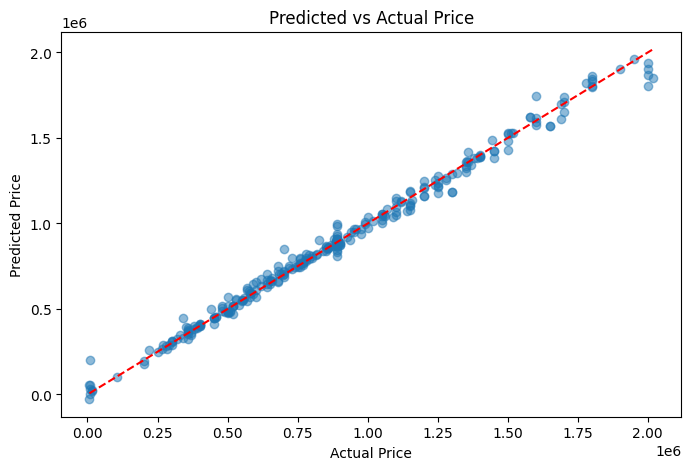

In [50]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price")
plt.show()

# 📊 Visualisation de l'importance des variables dans le modèle XGBoost (top 15).

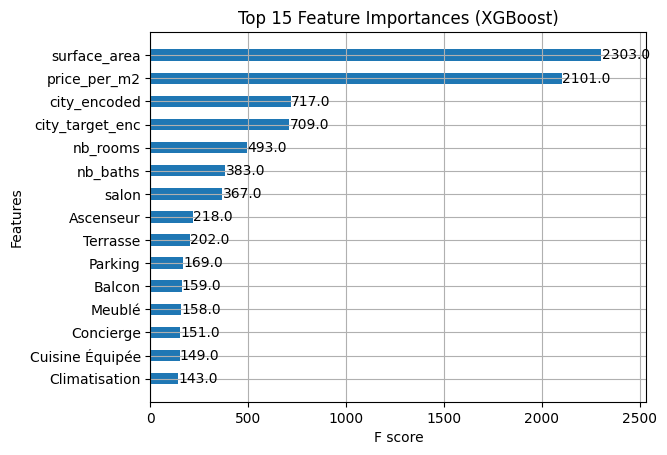

In [51]:
import xgboost as xgb

xgb.plot_importance(model_xgb, max_num_features=15, height=0.5)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()

# Validation croisée (cross-validation) du modèle XGBoost pour évaluer la robustesse du modèle.

In [63]:
    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(model_xgb, X, y, cv=5, scoring='r2')
    print("R² scores for each fold:", scores)
    print("Average R²:", scores.mean())

R² scores for each fold: [0.98931853 0.99074634 0.99213005 0.98882097 0.98503991]
Average R²: 0.9892111590592529


# 💾 Sauvegarde du modèle XGBoost entraîné pour une utilisation ultérieure.

In [62]:
import joblib
joblib.dump(model_xgb, "final_modele.joblib")

['final_modele.joblib']